# Chlorophyll concentration
Data downloaded from OceanColor.

In [1]:
import sys
sys.path.insert(0, '..')
import os
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PathCollection
from matplotlib.path import Path
from importlib import reload
reload(filament)
plt.rcParams.update({'font.size': 18})

In [2]:
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

## Logger

In [3]:
logger = logging.getLogger("SSTanom")
logger.setLevel(logging.INFO)
logging.info("Starting")

## Files and directories

In [4]:
figdir = "../figures/"
datafile = "/data/Chloro/T20000552020182.L3m_CU_CHL_chlor_a_9km.nc"
if not os.path.exists(figdir):
    os.makedirs(figdir)
bgcolor = "white"
fgcolor = "black"

## Plot preparation
### Projection

In [23]:
m = Basemap(projection='ortho', lon_0=-52., lat_0=10, resolution='c')
#m = Basemap(projection='robin',resolution='i',lat_0=0,lon_0=0)
llon, llat = np.meshgrid(lon, lat)
lonp, latp = m(llon, llat)
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

## Data reading

In [9]:
def load_chloro(datafile):
    with netCDF4.Dataset(datafile) as nc:
        lat = nc.variables["lat"][:]
        lon = nc.variables["lon"][:]
        chlor = nc.variables["chlor_a"][:]
    
        
    return lon, lat, chlor

In [15]:
lon, lat, chloro = load_chloro(datafile)

### Plotting function

## Plot

INFO:SSTanom:Saving figure


<Figure size 432x288 with 0 Axes>

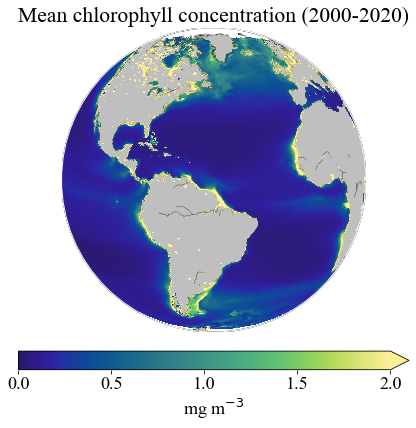

In [31]:
plt.close("all")
plt.clf()
vmin = 0.
vmax = 2.
normanom = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

figtitle = "Mean chlorophyll concentration (2000-2020)"


fig = plt.figure(figsize=(10, 7))

ax = plt.gca()
plt.title(figtitle)

pcm = m.pcolor(lonp, latp, chloro,
                   cmap=cmocean.cm.haline, vmin=vmin, vmax=vmax, zorder=2)

m.drawmapboundary(
color='w',
linewidth=1.0,
fill_color='none', zorder=2)

cb = plt.colorbar(pcm, shrink=.7, norm=normanom,
             orientation='horizontal', extend="max", pad=0.05)

cb.set_label("mg m$^{-3}$", fontsize=18, color=fgcolor)
cb.ax.tick_params(axis='x', colors=fgcolor)


#pcm, cb = make_monthly_subplot(m, lonp, latp, Tanom[ii,:,:], NN=1, fgcolor=fgcolor)

m.drawcoastlines(ax=ax, color=".25", linewidth=.25)
m.fillcontinents(ax=ax, color=".75")

logger.info("Saving figure")

plt.savefig(os.path.join(figdir, "choro_MODIS_Terra4.jpg"), 
            facecolor=fig.get_facecolor(),
            dpi=300, bbox_inches="tight")


plt.show()
ax.cla()
plt.close()   
fig.clf()